In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from insertion_sort import insertion_sort
from selection_sort import selection_sort
from heap_sort import heap_sort
from quick_sort import quick_sort
from merge_sort import merge_sort
from bucket_sort import bucket_sort

In [3]:
def measure_times(a_sort, power_range=(3, 12), n_loop=1000, max_int=10000, duplication=False):
    times = []
    for p in power_range:
        n = 2**p
        print("n=" + str(n) + " started...", end="")
        if duplication:
            # each array has 20 same values on average
            arrays = [list(np.random.randint(0, (n//20)+1, n)) for _ in range(n_loop)] 
        else:
            arrays = [list(np.random.randint(0, max_int+1, n)) for _ in range(n_loop)]
        start_time = time.time()
        for array in arrays:
            a_sort(array)
        averaged_time = (time.time() - start_time) / n_loop
        times.append(averaged_time)
        print("finished! time: " + str(averaged_time * 1000) + " ms.")
    
    return times

In [9]:
times = measure_times(bucket_sort, power_range=range(2, 14), n_loop=300)

n=4 started...finished! time: 0.010709762573242188 ms.
n=8 started...finished! time: 0.0214997927347819 ms.
n=16 started...finished! time: 0.04340012868245443 ms.
n=32 started...finished! time: 0.059179464975992836 ms.
n=64 started...finished! time: 0.10076363881429036 ms.
n=128 started...finished! time: 0.20125627517700195 ms.
n=256 started...finished! time: 0.4112466176350912 ms.
n=512 started...finished! time: 1.0231828689575195 ms.
n=1024 started...finished! time: 1.720123291015625 ms.
n=2048 started...finished! time: 3.492143154144287 ms.
n=4096 started...finished! time: 7.684780756632487 ms.
n=8192 started...finished! time: 16.995150248209633 ms.


In [45]:
times = measure_times(sorted, max_power=12, n_loop=30)

n=3 started...finished! time: 0.0005404154459635416 ms.
n=9 started...finished! time: 0.0012079874674479165 ms.
n=27 started...finished! time: 0.004108746846516928 ms.
n=81 started...finished! time: 0.017301241556803383 ms.
n=243 started...finished! time: 0.1255353291829427 ms.
n=729 started...finished! time: 0.2686659495035807 ms.
n=2187 started...finished! time: 1.023268699645996 ms.
n=6561 started...finished! time: 3.1094392140706377 ms.
n=19683 started...finished! time: 12.779895464579266 ms.
n=59049 started...finished! time: 36.4997943242391 ms.
n=177147 started...finished! time: 125.86463292439778 ms.
n=531441 started...finished! time: 465.84999561309814 ms.


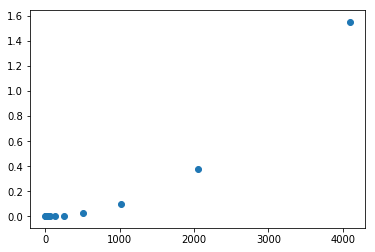

In [54]:
ns = [2**i for i in range(1, 13)]
plt.scatter(ns, times)

In [61]:
from scipy.optimize import curve_fit
def n1_func(x, a):
    return a * x
def n2_func(x, a):
    return a * x**2
def nlogn_func(x, a):
    return a * x * np.log2(x)

In [56]:
params, cov = curve_fit(n2_func, ns, times)

In [57]:
params

array([9.24811834e-08])

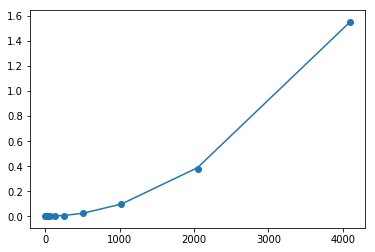

In [58]:
plt.scatter(ns, times)
plt.plot(ns, params[0] * np.array(ns)**2)